In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import json

## Loading results

In [2]:
rca = pd.read_csv('../../data/results/rca.csv')
meta = pd.read_csv('../../data/psychNorms/psychNorms_metadata.csv', index_col='norm')

print(f"# Norms: {len(meta.index.unique())}")
print(f"# Norm categories: {len(meta['category'].unique())}")

# Adding norm category
rca['norm_category'] = (
    rca['norm'].apply(lambda norm: meta.loc[norm]['category'])
    .replace({'_': ' '}, regex=True)
)
rca

# Norms: 292
# Norm categories: 27


,embed,embed_type,norm,train_n,test_n,p,r2_mean,r2_sd,mse_mean,mse_sd,check,norm_category
0,CBOW_GoogleNews,text,Freq_HAL,28012,7003,300,0.522106,0.008390,2.715519,0.072449,pass,frequency
1,CBOW_GoogleNews,text,Freq_KF,19285,4822,300,0.500385,0.009733,0.156678,0.004765,pass,frequency
2,CBOW_GoogleNews,text,Freq_SUBTLEXUS,28636,7159,300,0.537246,0.009834,0.361360,0.007800,pass,frequency
3,CBOW_GoogleNews,text,Freq_SUBTLEXUK,29316,7330,300,0.545626,0.008433,0.446059,0.009071,pass,frequency
4,CBOW_GoogleNews,text,Freq_Blog,31876,7969,300,0.523688,0.008467,0.400176,0.009336,pass,frequency
...,...,...,...,...,...,...,...,...,...,...,...,...
7295,THINGS,behavior,familiarity_vanarsdall,376,95,49,0.060692,0.083942,3326.617511,620.203961,pass,familiarity
7296,THINGS,behavior,imageability_vanarsdall,376,95,49,0.053593,0.095680,1345.018025,292.430129,pass,imageability
7297,THINGS,behavior,familiarity_fear,173,44,49,0.139160,0.160894,0.790788,0.216911,pass,familiarity
7298,THINGS,behavior,aoa_fear,173,44,49,-0.021206,0.121789,0.533727,0.039008,pass,age of acquisition


In [3]:
rca.query('embed_type == "brain"').sort_values(by='r2_mean', ascending=True)

,embed,embed_type,norm,train_n,test_n,p,r2_mean,r2_sd,mse_mean,mse_sd,check,norm_category
4116,fMRI_text_hyper_align,brain,Nmeanings_Wordsmyth,27,7,1000,-3.537278e+28,7.074556e+28,0.023026,0.020744,pass,semantic diversity
6452,EEG_speech,brain,Nmeanings_Wordsmyth,48,13,130,-3.341997e+28,6.683994e+28,0.026153,0.009636,pass,semantic diversity
5469,fMRI_speech_hyper_align,brain,tabooness_janschewitz,13,4,6,-5.755566e+02,9.901147e+02,0.261537,0.464192,pass,social/moral
6321,microarray,brain,neutral_zupan,11,3,15,-4.666180e+02,9.304401e+02,2.096527,1.094010,pass,valence
6319,microarray,brain,happy_zupan,11,3,15,-6.965655e+01,8.306892e+01,7.503055,5.805470,pass,emotion
...,...,...,...,...,...,...,...,...,...,...,...,...
6651,EEG_speech,brain,aoa_juhasz,5,2,130,NaN,NaN,NaN,NaN,too few observations,age of acquisition
6652,EEG_speech,brain,transparency_juhasz,5,2,130,NaN,NaN,NaN,NaN,too few observations,iconicity/transparency
6653,EEG_speech,brain,lexeme_dominance,5,2,130,NaN,NaN,NaN,NaN,too few observations,iconicity/transparency
6654,EEG_speech,brain,imageability_juhasz,5,2,130,NaN,NaN,NaN,NaN,too few observations,imageability


In [4]:
# Stats reported in the paper
def mean_r2(embed, norm_category):
    mean_r2 = rca.query(f"embed == '{embed}' & norm_category == '{norm_category}'")['r2_mean'].mean()
    print(f'{embed} {norm_category} mean r2: {mean_r2.round(2)}')

# Mean r2s
mean_r2('CBOW_GoogleNews', 'part of speech')
mean_r2('CBOW_GoogleNews', 'animacy')
mean_r2('CBOW_GoogleNews', 'concreteness')

CBOW_GoogleNews part of speech mean r2: 0.66
CBOW_GoogleNews animacy mean r2: 0.7
CBOW_GoogleNews concreteness mean r2: 0.68


In [5]:
with open('../../data/raw/embed_to_dtype.json', 'r') as f:
    embed_to_type = json.load(f)
    
rca['embed_type'] = rca['embed'].map(embed_to_type)
rca

,embed,embed_type,norm,train_n,test_n,p,r2_mean,r2_sd,mse_mean,mse_sd,check,norm_category
0,CBOW_GoogleNews,text,Freq_HAL,28012,7003,300,0.522106,0.008390,2.715519,0.072449,pass,frequency
1,CBOW_GoogleNews,text,Freq_KF,19285,4822,300,0.500385,0.009733,0.156678,0.004765,pass,frequency
2,CBOW_GoogleNews,text,Freq_SUBTLEXUS,28636,7159,300,0.537246,0.009834,0.361360,0.007800,pass,frequency
3,CBOW_GoogleNews,text,Freq_SUBTLEXUK,29316,7330,300,0.545626,0.008433,0.446059,0.009071,pass,frequency
4,CBOW_GoogleNews,text,Freq_Blog,31876,7969,300,0.523688,0.008467,0.400176,0.009336,pass,frequency
...,...,...,...,...,...,...,...,...,...,...,...,...
7295,THINGS,behavior,familiarity_vanarsdall,376,95,49,0.060692,0.083942,3326.617511,620.203961,pass,familiarity
7296,THINGS,behavior,imageability_vanarsdall,376,95,49,0.053593,0.095680,1345.018025,292.430129,pass,imageability
7297,THINGS,behavior,familiarity_fear,173,44,49,0.139160,0.160894,0.790788,0.216911,pass,familiarity
7298,THINGS,behavior,aoa_fear,173,44,49,-0.021206,0.121789,0.533727,0.039008,pass,age of acquisition


In [6]:
# Taking the embedding with the highest mean r2 from each embed_type
top_embeds = (
    rca[['embed', 'embed_type', 'r2_mean']]
    .groupby(['embed', 'embed_type'], as_index=False)
    .mean('r2_mean').set_index('embed')
    .groupby('embed_type').idxmax()['r2_mean']
)    

top_embeds

embed_type
behavior      PPMI_SVD_SWOW
brain              EEG_text
text        CBOW_GoogleNews
Name: r2_mean, dtype: object

In [7]:
# Ordering norms by top behavior model mean r2
top_behav= top_embeds['behavior']
norm_order = (
    rca[rca['embed'] == top_behav][['norm_category', 'r2_mean']]
    .groupby('norm_category').mean().sort_values(by='r2_mean')
    .index
)
rca['norm_category'] = pd.Categorical(rca['norm_category'], norm_order)
rca = rca.sort_values(by='norm_category').reset_index(drop=True)
rca

,embed,embed_type,norm,train_n,test_n,p,r2_mean,r2_sd,mse_mean,mse_sd,check,norm_category
0,PPMI_SVD_SouthFlorida,behavior,imageability_rt_cortese,1387,347,300,0.118551,0.014756,39333.267236,1853.711599,pass,semantic decision
1,EEG_text,brain,rt_chen,102,26,104,-0.069224,0.034431,13389.496745,6820.774623,pass,semantic decision
2,GloVe_CommonCrawl,text,rt_khanna,1038,260,300,-0.044515,0.049877,429666.826239,51757.863388,pass,semantic decision
3,fastText_CommonCrawl,text,aoa_rt_cortese,2356,590,300,-0.054709,0.052357,222673.765433,21277.453531,pass,semantic decision
4,eye_tracking,brain,imageability_rt_cortese,960,240,6,-0.011236,0.015231,42012.154340,7307.072183,pass,semantic decision
...,...,...,...,...,...,...,...,...,...,...,...,...
7295,fastText_CommonCrawl,text,valence_imbault,1827,457,300,0.533725,0.066066,0.682890,0.068663,pass,valence
7296,GloVe_CommonCrawl,text,valence_hollis,829,208,300,0.740462,0.068868,0.004922,0.000275,pass,valence
7297,GloVe_Twitter,text,Pleasant_Binder,425,107,200,0.313602,0.054384,1.511360,0.155584,pass,valence
7298,GloVe_CommonCrawl,text,pleasantness_brown,505,127,300,0.587874,0.094278,0.693019,0.056343,pass,valence


In [8]:
# rca mean
rca_mean = (
    rca[['norm_category', 'embed', 'r2_mean']]
    .groupby(['norm_category', 'embed'], as_index=False).mean()
)
# rca_mean['norm_category'] = rca_mean['norm_category'].str.title()
rca_mean

,norm_category,embed,r2_mean
0,semantic decision,CBOW_GoogleNews,0.122438
1,semantic decision,EEG_speech,-0.151847
2,semantic decision,EEG_text,-0.317302
3,semantic decision,GloVe_CommonCrawl,-0.412279
4,semantic decision,GloVe_Twitter,-0.342793
...,...,...,...
670,valence,fastText_Wiki_News,0.591462
671,valence,microarray,-31.357512
672,valence,morphoNLM,0.289118
673,valence,norms_sensorimotor,0.074552


## Scatter plot

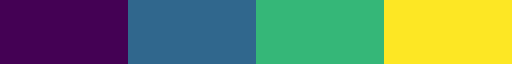

In [9]:
plt.get_cmap('viridis', 4)

In [10]:
# Colors 
cmap = plt.get_cmap('viridis', 4)
embed_type_to_color = {
    'brain': cmap(1),
    'behavior': cmap(0),
    'text': cmap(2)
}
{key: mcolors.to_hex(value) for key, value in embed_type_to_color.items()}

{'brain': '#31688e', 'behavior': '#440154', 'text': '#35b779'}

**Top embeddings**

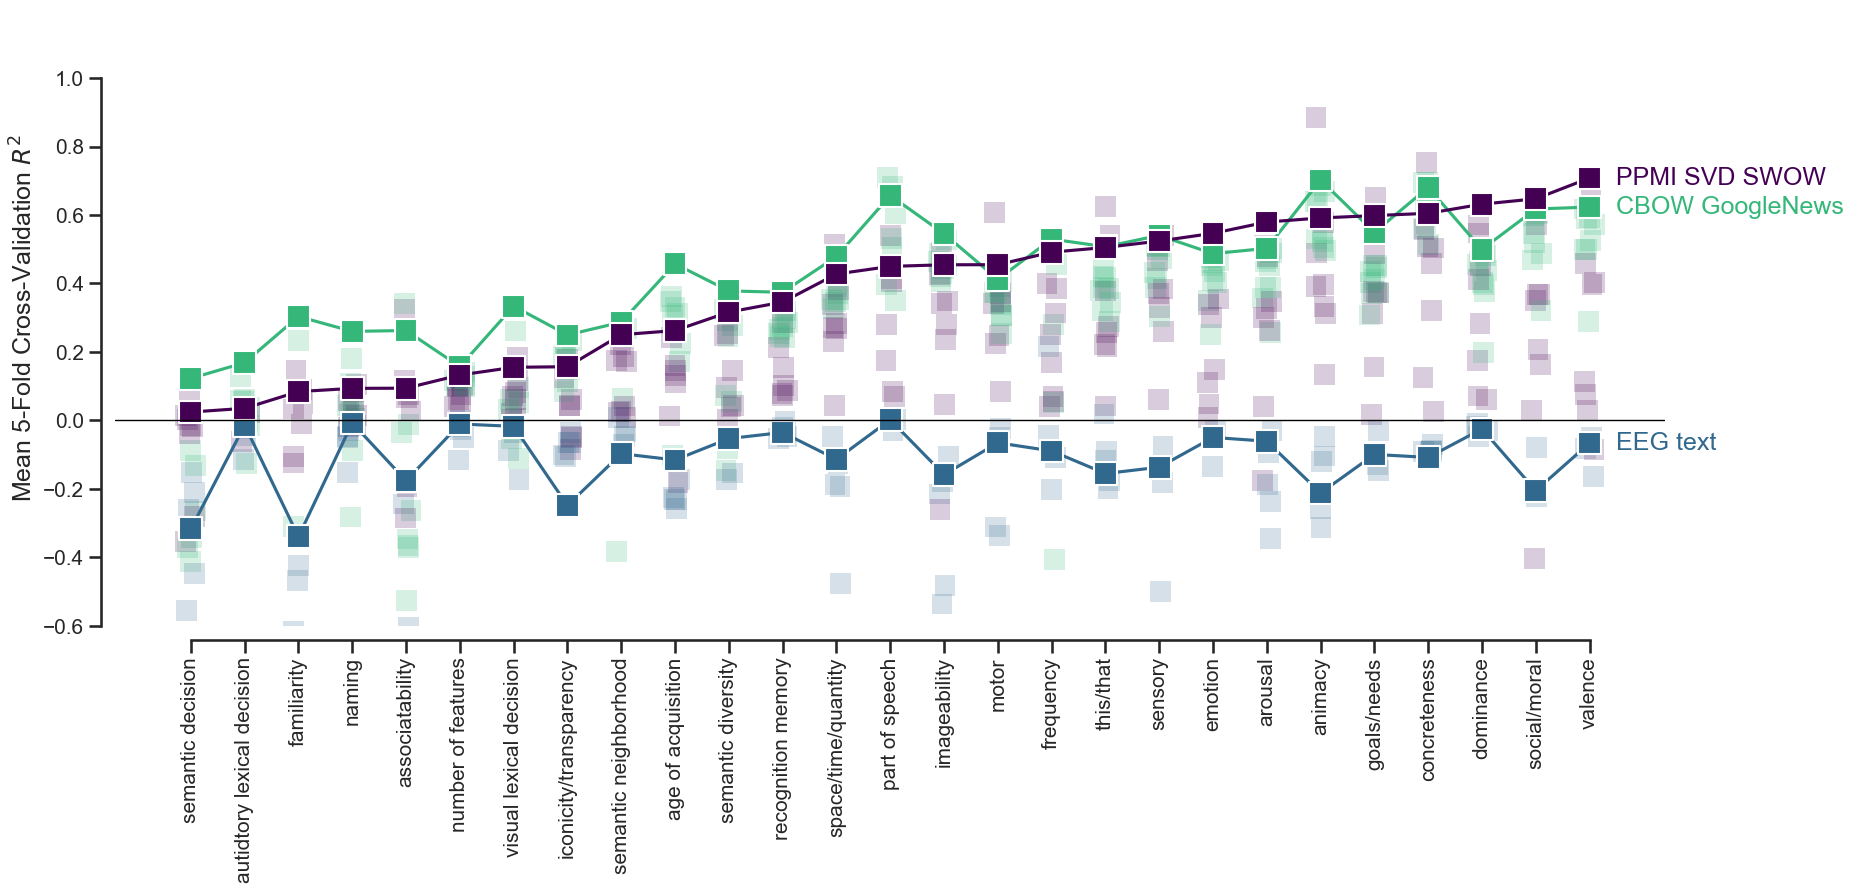

In [11]:
sns.set(context='talk', style='white')
fig, ax = plt.subplots(figsize=(20, 8))

embed_to_color = {embed: embed_type_to_color[embed_to_type[embed]] for embed in embed_to_type.keys()}

sns.stripplot(
    rca_mean.query('embed not in @top_embeds'),
    x='norm_category', y='r2_mean', hue='embed', 
    s=15, marker='s', palette=embed_to_color, alpha=.2, 
    zorder=0, ax=ax
)

sns.lineplot(
    rca_mean.query('embed in @top_embeds'),
    x='norm_category', y='r2_mean', hue='embed',
    palette=embed_to_color, zorder=1, ax=ax
)

# Square markers
sns.scatterplot(
    rca_mean.query('embed in @top_embeds'), marker='s',
    x='norm_category', y='r2_mean', hue='embed',
    s=270, palette=embed_to_color, edgecolor='white', linewidth=1.5,
    zorder=2, ax=ax
)

ax.legend_.remove()

# Labelling top embeddings on the right side in line with their right hand points
occ_ys = []
for embed in top_embeds:
    x = 26.5
    y = rca_mean.query('embed == @embed')['r2_mean'].iloc[-1]
    if occ_ys:
        while min([abs(y - occ_y) for occ_y in occ_ys]) < 0.08:
            np.random.seed(42)
            y += np.random.uniform(-0.05, 0.05)
    occ_ys.append(y)
    ax.text(x, y, embed.replace('_', ' '), ha='left', va='center', color=embed_to_color[embed], fontsize=18)

# Formatting axes
ax.set(
    ylim=(-.6, 1.2), xlabel='', ylabel='Mean 5-Fold Cross-Validation $R^2$',
    yticks=np.arange(-.6, 1.2, .2)
)
ax.axhline(0, color='black', lw=1)
ax.tick_params(axis='x', rotation=90, which='both', bottom=True, top=False, labelbottom=True, labelsize=15)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=15)

sns.despine(offset=10, trim=True)
plt.savefig('../../figures/rca.png', dpi=300, bbox_inches='tight')

## Heatmap

In [12]:
norm_order

Index(['semantic decision', 'autidtory lexical decision', 'familiarity',
       'naming', 'associatability', 'number of features',
       'visual lexical decision', 'iconicity/transparency',
       'semantic neighborhood', 'age of acquisition', 'semantic diversity',
       'recognition memory', 'space/time/quantity', 'part of speech',
       'imageability', 'motor', 'frequency', 'this/that', 'sensory', 'emotion',
       'arousal', 'animacy', 'goals/needs', 'concreteness', 'dominance',
       'social/moral', 'valence'],
      dtype='object', name='norm_category')

In [13]:
# Pivots rca_mean to a matrix for each embed type
rca_mean['embed_type'] = rca_mean['embed'].map(embed_to_type)

rca_mean_pivs = {}
embed_types = ['text', 'brain', 'behavior']
for embed_type in embed_types:
    rca_mean_piv = rca_mean.query('embed_type == @embed_type').pivot(index='embed', columns='norm_category', values='r2_mean')
    
    # Sorts index by grand mean of embeds
    embed_order = rca_mean_piv.mean(axis=1).sort_values(ascending=False).index
    rca_mean_pivs[embed_type] = rca_mean_piv[norm_order].loc[embed_order]

rca_mean.query('embed_type == "text"').pivot(index='embed', columns='norm_category', values='r2_mean')

norm_category,semantic decision,autidtory lexical decision,familiarity,naming,associatability,number of features,visual lexical decision,iconicity/transparency,semantic neighborhood,age of acquisition,...,this/that,sensory,emotion,arousal,animacy,goals/needs,concreteness,dominance,social/moral,valence
embed,,,,,,,,,,,,,,,,,,,,,
CBOW_GoogleNews,0.122438,0.168458,0.303338,0.259828,0.262282,0.156893,0.333457,0.249431,0.286677,0.457074,...,0.507188,0.540251,0.486967,0.502417,0.702247,0.549035,0.680636,0.499618,0.617349,0.623108
GloVe_CommonCrawl,-0.412279,0.055048,-1.292776,0.018395,-0.366605,0.117200,-0.026716,0.179149,-3.918304,0.362561,...,0.379592,0.509528,0.467588,0.488676,0.639343,0.446801,0.638481,0.490766,0.608286,0.617588
GloVe_Twitter,-0.342793,-0.015563,-0.971194,-0.089045,-0.264279,0.120785,0.095200,0.152092,0.062660,0.224761,...,0.387567,0.387587,0.349619,0.389184,0.544142,0.402720,0.560921,0.376785,0.518907,0.500066
GloVe_Wikipedia,-0.088012,-0.000071,-0.337360,0.006937,-0.011389,0.100848,-0.053316,0.113455,-160.933444,0.331220,...,0.420984,0.414121,0.407602,0.357224,0.494988,0.434108,0.574588,0.396090,0.468397,0.524952
LexVec_CommonCrawl,-0.265181,0.057686,-1.383565,0.044329,-0.346953,0.125967,0.052899,0.188096,-9.987169,0.172085,...,0.442122,0.497680,0.450898,0.473370,0.669518,0.453276,0.630403,0.436901,0.599260,0.588832
fastTextSub_OpenSub,-0.890018,-0.126190,-1.760442,-0.282764,-0.977524,0.105162,-0.712227,0.232124,-0.903288,-0.103642,...,0.319292,0.506556,0.433539,0.463793,0.638864,0.411578,0.694346,0.464486,0.580046,0.572658
fastText_CommonCrawl,-0.373282,0.023047,-5.134365,0.039286,-0.526425,0.141140,-0.111686,0.207182,-0.935626,0.312609,...,0.417664,0.507618,0.476364,0.501319,0.687218,0.372493,0.693923,0.481840,0.603601,0.617187
fastText_Wiki_News,-0.312769,0.039046,-3.233067,0.107093,-0.035089,0.140820,0.031292,0.183411,-0.382326,0.307055,...,0.344320,0.471384,0.460425,0.451203,0.529724,0.370316,0.666144,0.455525,0.546650,0.591462
morphoNLM,0.124570,0.128515,0.232135,0.181690,0.342022,0.099716,0.261134,0.083814,0.268983,0.346717,...,0.288133,0.303022,0.250749,0.255844,0.504418,0.307879,0.513841,0.198628,0.320484,0.289118


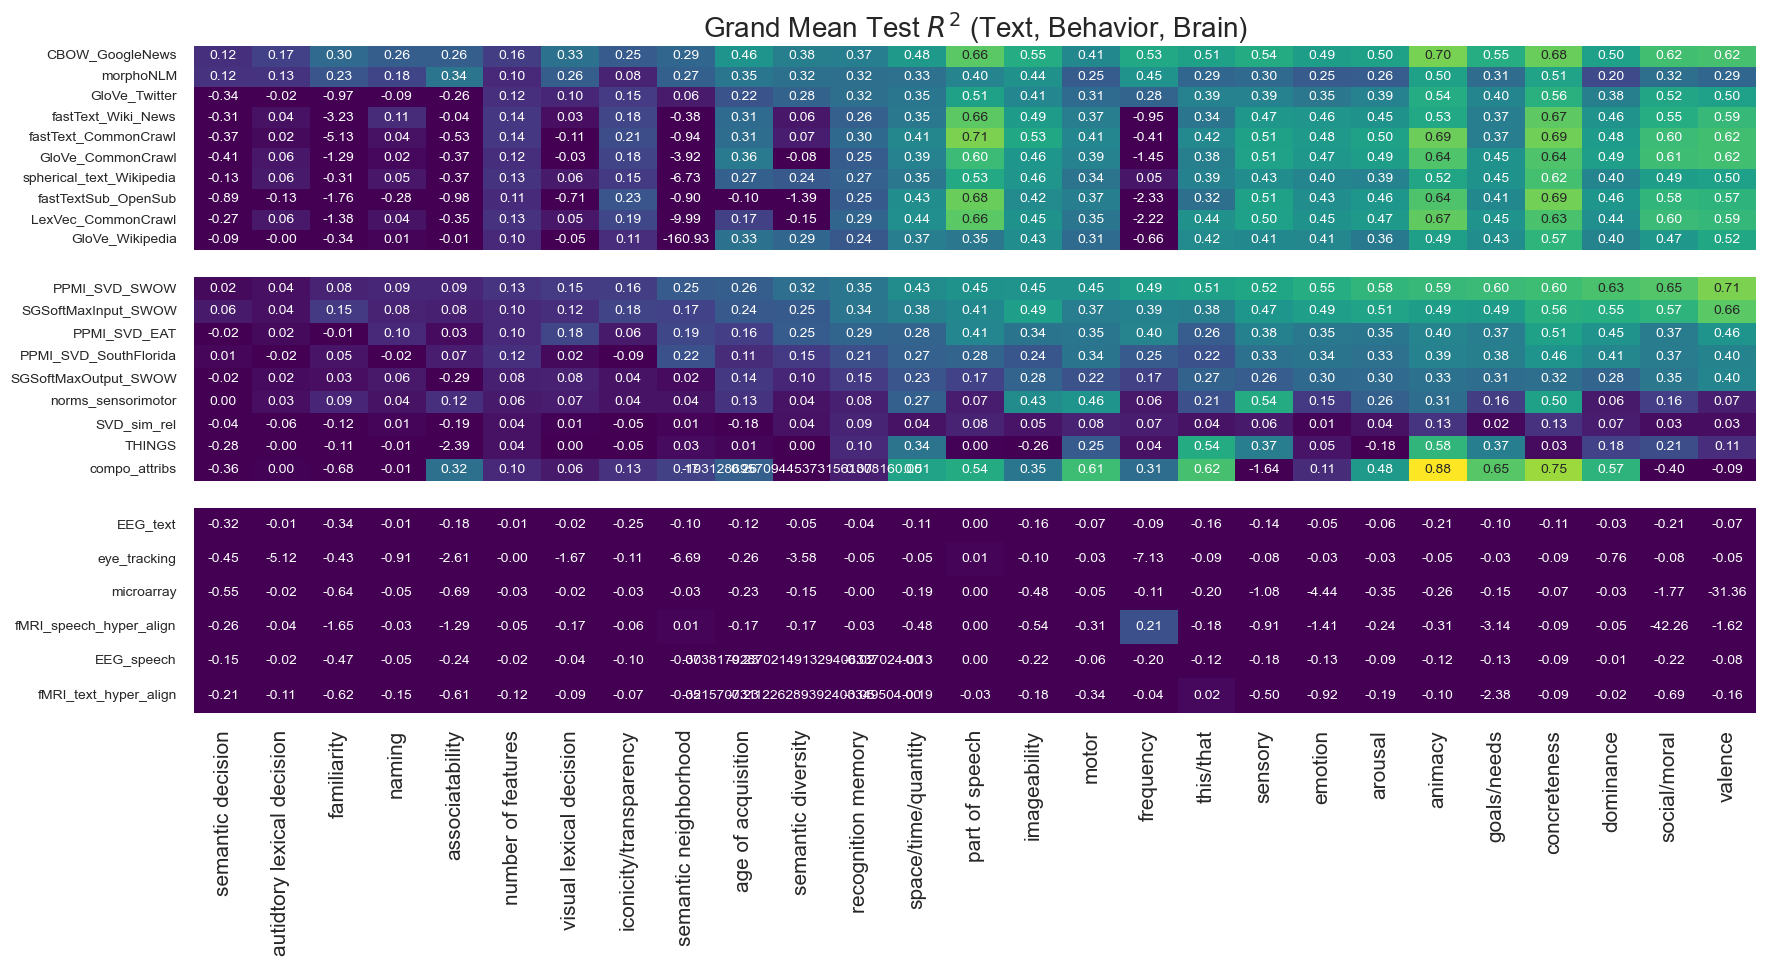

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(18, 10))

for i, embed_type in enumerate(['text', 'behavior', 'brain']):
    sns.heatmap(
        rca_mean_pivs[embed_type], cmap='viridis', ax=axs[i], vmin=0, vmax=rca_mean['r2_mean'].max(),
        annot=True, fmt='.2f', annot_kws={'fontsize': 10}, cbar=False
    )
    axs[i].set(xlabel='', ylabel='', xticklabels=[])
    
    # Ensure y-axis labels match the number of ticks
    axs[i].set_yticks(pd.Series(range(len(rca_mean_pivs[embed_type].index))) + .5)
    axs[i].set_yticklabels(rca_mean_pivs[embed_type].index, fontsize=10)
    
# Adding xticklabels to last plot
axs[-1].set_xticklabels(norm_order, rotation=90, fontsize=15)

# Sets figure title
axs[0].set_title('Grand Mean Test $R^2$ (Text, Behavior, Brain)', fontsize=20)
    
fig.tight_layout()
plt.savefig('../../figures/rca_heatmap.png', dpi=300, bbox_inches='tight')

In [15]:
rca_mean.sort_values(by='r2_mean', ascending=True)

,norm_category,embed,r2_mean,embed_type
267,semantic diversity,fMRI_text_hyper_align,-3.215707e+27,brain
251,semantic diversity,EEG_speech,-3.038179e+27,brain
264,semantic diversity,compo_attribs,-1.931287e+27,behavior
205,semantic neighborhood,GloVe_Wikipedia,-1.609334e+02,text
641,social/moral,fMRI_speech_hyper_align,-4.225872e+01,brain
...,...,...,...,...
525,animacy,CBOW_GoogleNews,7.022474e-01,text
658,valence,PPMI_SVD_SWOW,7.080546e-01,behavior
344,part of speech,fastText_CommonCrawl,7.106479e-01,text
589,concreteness,compo_attribs,7.525829e-01,behavior


In [16]:
rca.sort_values(by='r2_mean', ascending=True)

,embed,embed_type,norm,train_n,test_n,p,r2_mean,r2_sd,mse_mean,mse_sd,check,norm_category
2143,fMRI_text_hyper_align,brain,Nmeanings_Wordsmyth,27,7,1000,-3.537278e+28,7.074556e+28,0.023026,0.020744,pass,semantic diversity
2092,EEG_speech,brain,Nmeanings_Wordsmyth,48,13,130,-3.341997e+28,6.683994e+28,0.026153,0.009636,pass,semantic diversity
2102,compo_attribs,behavior,Nmeanings_Wordsmyth,26,7,62,-2.124416e+28,2.728778e+28,0.009714,0.006723,pass,semantic diversity
1463,GloVe_Wikipedia,text,Sem_N,26030,6508,300,-1.126514e+03,2.231969e+03,4.158003,2.638707,pass,semantic neighborhood
6740,fMRI_speech_hyper_align,brain,tabooness_janschewitz,13,4,6,-5.755566e+02,9.901147e+02,0.261537,0.464192,pass,social/moral
...,...,...,...,...,...,...,...,...,...,...,...,...
6949,compo_attribs,behavior,Unpleasant_Binder,427,107,62,NaN,NaN,NaN,NaN,associated_embed,valence
6951,compo_attribs,behavior,Pleasant_Binder,427,107,62,NaN,NaN,NaN,NaN,associated_embed,valence
6958,THINGS,behavior,valence_zupan,0,0,49,NaN,NaN,NaN,NaN,too few observations,valence
6961,THINGS,behavior,neutral_zupan,0,0,49,NaN,NaN,NaN,NaN,too few observations,valence
